## 3-Sigma Technique (Standar Deviasion)

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import pandas as pd

In [2]:
data = pd.read_csv('./dataset/raw_sales.csv')
data.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


In [3]:
# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(data):
    #define a list to accumlate anomalies
    anomalies = []
    
    # Set upper and lower limit to 3 standard deviation
    random_data_std = statistics.stdev(data)
    random_data_mean = statistics.mean(data)
    # 3-standard deviation
    
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    
    # Generate outliers
    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

In [4]:
data.price

0        525000
1        290000
2        328000
3        380000
4        310000
          ...  
29575    500000
29576    560000
29577    464950
29578    589000
29579    775000
Name: price, Length: 29580, dtype: int64

In [5]:
list_1 = find_anomalies(data['price'])
print(len(list_1),len(data),data.price.skew())

461 29580 4.312009366902366


Menggunakan metode skew() pada kolom 'price' dalam DataFrame 'data' untuk mengukur kemiringan distribusi data. Skewness mengukur seberapa asimetris distribusi data. Jika skewness positif, maka distribusi condong ke kanan; jika negatif, distribusi condong ke kiri.

- Jika skewness > 0: Distribusi condong ke kanan (ekor panjang ke arah nilai yang lebih tinggi).
- Jika skewness < 0: Distribusi condong ke kiri (ekor panjang ke arah nilai yang lebih rendah).
- Jika skewness = 0: Distribusi simetris.

<Axes: xlabel='price', ylabel='Density'>

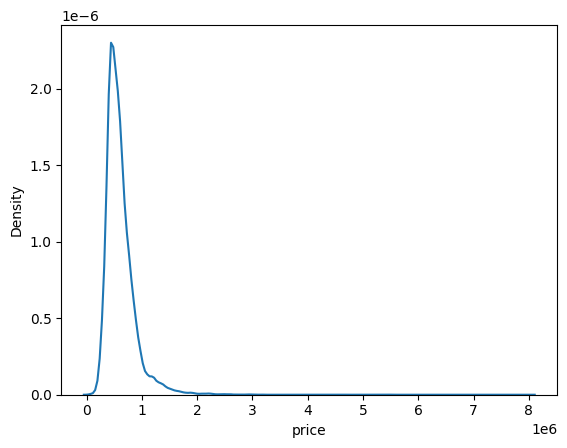

In [6]:
sns.kdeplot(data.price)

## Transformasi Data

In [7]:
import numpy as np

In [8]:
data['price_transformed'] = np.log(data.price)
list_2 = find_anomalies(data.price_transformed)
print(len(list_2),len(data),data.price_transformed.skew())

266 29580 0.4731646269984763


<Axes: xlabel='price_transformed', ylabel='Density'>

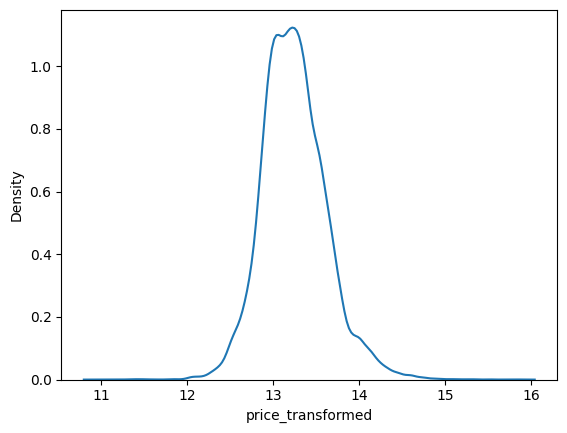

In [9]:
sns.kdeplot(data.price_transformed)

## Boxplots

<Axes: >

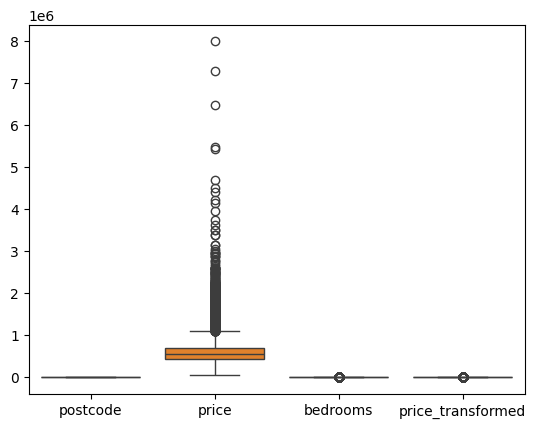

In [10]:
sns.boxplot(data=data)

In [12]:
df_weight = pd.read_csv("./dataset/weight-height.csv")

df_weight.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [13]:
df_weight.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [23]:
IQR = df_weight.describe().loc['75%']['Height'] - df_weight['Height'].quantile(0.25)
IQR

5.668641245615746

In [24]:
lower_limit = df_weight['Height'].quantile(0.25) - 1.5 * IQR
upper_limit = df_weight['Height'].quantile(0.75) + 1.5 * IQR

print(lower_limit,upper_limit)

55.00265861279534 77.67722359525831


In [26]:
df_weight.loc[(df_weight['Height'] < lower_limit) | (df_weight['Height'] > upper_limit) ]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
9285,Female,54.263133,64.700127


In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_weight[['Height','Weight']] = scaler.fit_transform(df_weight[['Height','Weight']])

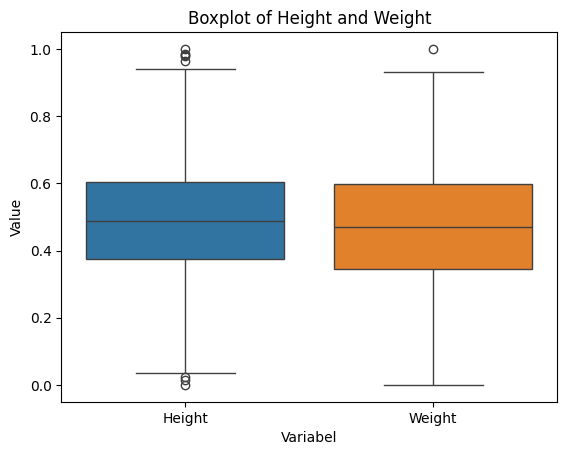

In [35]:
# Menggambar boxplot untuk kolom 'Height' dan 'Weight'
sns.boxplot(data=df_weight[['Height', 'Weight']])

# Menambahkan label sumbu dan judul grafik
plt.xlabel('Variabel')
plt.ylabel('Value')
plt.title('Boxplot of Height and Weight')

# Menampilkan grafik
plt.show()